<a href="https://colab.research.google.com/github/farihahahaa/farihahahaa/blob/main/Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports

import pandas as pd
#Import scikit-learn dataset library
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import graphviz

In [11]:
#Load dataset
cancer = datasets.load_breast_cancer(as_frame=True)
df = cancer.data

df['target'] = cancer.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


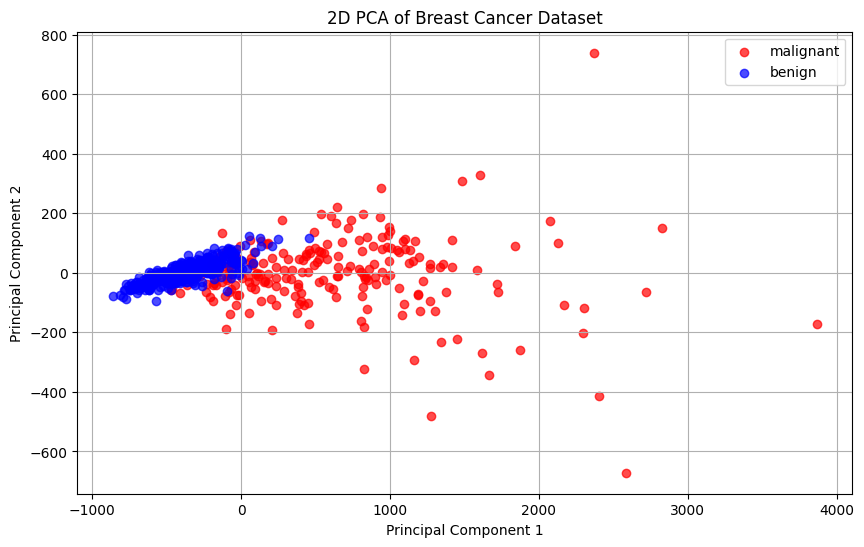

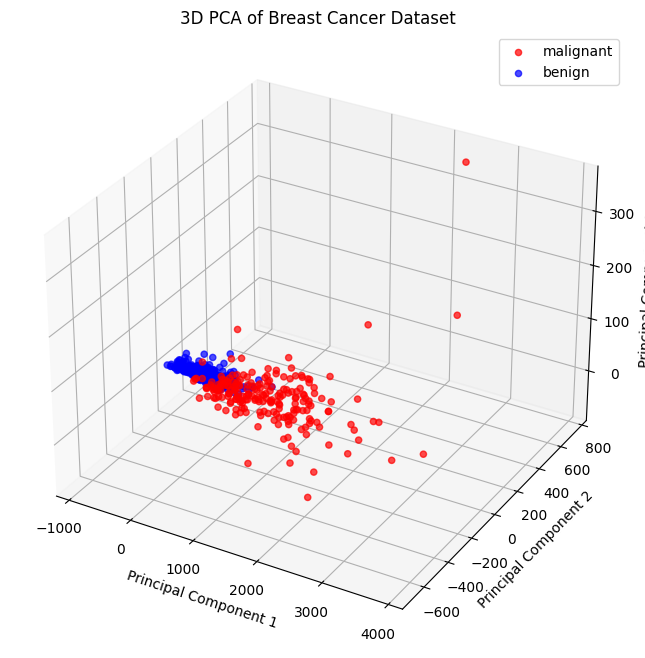

Logistic Regression Accuracy: 0.96
SVM Accuracy (Linear Kernel): 0.97


In [22]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names

# Reduce dimensions to 2D using PCA
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[y == 0, 0], X_2d[y == 0, 1], alpha=0.7, c='red', label=labels[0])
plt.scatter(X_2d[y == 1, 0], X_2d[y == 1, 1], alpha=0.7, c='blue', label=labels[1])
plt.title('2D PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Reduce dimensions to 3D using PCA
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X)

# Plot the first three principal components
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2], alpha=0.7, c='red', label=labels[0])
ax.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2], alpha=0.7, c='blue', label=labels[1])
ax.set_title('3D PCA of Breast Cancer Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

# Fit logistic regression to check linear separability
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X, y)
y_pred_logistic = logistic_model.predict(X)
accuracy_logistic = accuracy_score(y, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

# Fit SVM with linear kernel to check linear separability
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)
y_pred_svm = svm_model.predict(X)
accuracy_svm = accuracy_score(y, y_pred_svm)
print(f"SVM Accuracy (Linear Kernel): {accuracy_svm:.2f}")


In [13]:
#list(df.columns)

In [2]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [15]:
# print("Features: ", df.columns)

# print("Labels: ", df['target'].unique())

Features:  Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
Labels:  [0 1]


In [19]:
# print data(feature)shape
cancer.data.shape


(569, 31)

In [4]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [5]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Split Data

In [23]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


Generate Model

In [24]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


Evaluate Model

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [26]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0


# Code Blueprint

Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

# My Work

Link: https://archive.ics.uci.edu/dataset/14/breast+cancer

In [30]:
pip install ucimlrepo

In [102]:
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import fetch_openml

# fetch dataset
# breast_cancer = fetch_ucirepo(id=14)

# # data (as pandas dataframes)
# X = breast_cancer.data.features
# y = breast_cancer.data.targets

# # metadata
# print(breast_cancer.metadata)

# # variable information
# print(breast_cancer.variables)

breast_cancer2 = fetch_openml(data_id=14, as_frame=True)  # 'id=14' is for the UCI Breast Cancer dataset

# Convert to DataFrame
df = pd.concat([breast_cancer2.data, breast_cancer2.target], axis=1)

# Display the first few rows of the DataFrame
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


       att1      att2      att3      att4      att5      att6      att7  \
0  0.065882  0.197312  0.103826  0.270362  0.616078  0.035856  0.424572   
1  0.049142  0.175971  0.105515  0.227095  0.599280  0.041217  0.431078   
2  0.034172  0.227649  0.108766  0.127697  0.612494  0.056554  0.470639   
3  0.062336  0.217979  0.080243  0.289592  0.546316  0.045779  0.425545   
4  0.061970  0.198358  0.111239  0.253460  0.608455  0.023631  0.415246   

       att8      att9     att10  ...     att68     att69     att70     att71  \
0  0.089701  0.367773  0.037065  ...  0.113374  0.074343  0.281666  0.067795   
1  0.096801  0.326739  0.059661  ...  0.069337  0.045386  0.254264  0.045447   
2  0.041903  0.324267  0.044569  ...  0.218842  0.041087  0.360464  0.047154   
3  0.022841  0.331454  0.119052  ...  0.085479  0.087658  0.151880  0.075950   
4  0.091866  0.309310  0.049142  ...  0.106960  0.032283  0.248565  0.015674   

      att72     att73     att74     att75     att76  class  
0  0.34

In [99]:
df.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17',
       'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25',
       'att26', 'att27', 'att28', 'att29', 'att30', 'att31', 'att32', 'att33',
       'att34', 'att35', 'att36', 'att37', 'att38', 'att39', 'att40', 'att41',
       'att42', 'att43', 'att44', 'att45', 'att46', 'att47', 'att48', 'att49',
       'att50', 'att51', 'att52', 'att53', 'att54', 'att55', 'att56', 'att57',
       'att58', 'att59', 'att60', 'att61', 'att62', 'att63', 'att64', 'att65',
       'att66', 'att67', 'att68', 'att69', 'att70', 'att71', 'att72', 'att73',
       'att74', 'att75', 'att76', 'class'],
      dtype='object')

In [103]:
#df.isnull().sum().sort_values(ascending=False).head()

In [106]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

In [109]:
len(y) == len(X)

True

In [88]:
#X_clean = X.dropna()
# df_encoded = pd.get_dummies(X_clean, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'breast', 'breast-quad'])
# df_encoded['node-caps'] = X_clean['node-caps'].map(dict(yes=1, no=0))
# df_encoded['irradiat'] = X_clean['irradiat'].map(dict(yes=1, no=0))

In [113]:
# Fit logistic regression to check linear separability
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X, y)
y_pred_logistic = logistic_model.predict(X)
accuracy_logistic = accuracy_score(y, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

# Fit SVM with linear kernel to check linear separability
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)
y_pred_svm = svm_model.predict(X)
accuracy_svm = accuracy_score(y, y_pred_svm)
print(f"SVM Accuracy (Linear Kernel): {accuracy_svm:.2f}")

# Fit random forests to check linear separability
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)
y_pred_svm = svm_model.predict(X)
accuracy_svm = accuracy_score(y, y_pred_svm)
print(f"SVM Accuracy (Linear Kernel): {accuracy_svm:.2f}")

Logistic Regression Accuracy: 0.85
SVM Accuracy (Linear Kernel): 0.86


In [114]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test


In [115]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [120]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

In [125]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=4,
                                 cv=7)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fed7a968760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fed70e7a3b0>})

In [126]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
#Best hyperparameters: {'max_depth': 12, 'n_estimators': 343}

Best hyperparameters: {'max_depth': 12, 'n_estimators': 343}


In [156]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        53
          10       0.53      0.53      0.53        60
           2       0.73      0.72      0.73        50
           3       0.94      0.96      0.95        69
           4       0.89      0.89      0.89        61
           5       0.85      0.78      0.82        65
           6       0.85      0.94      0.89        54
           7       0.60      0.57      0.58        65
           8       0.89      0.92      0.90        71
           9       0.96      0.98      0.97        52

    accuracy                           0.82       600
   macro avg       0.82      0.83      0.83       600
weighted avg       0.82      0.82      0.82       600



In [ ]:
rf_best_param = RandomForestClassifier(max_depth=40,
                                    n_estimators=343)
rf_best_param.fit(X_train, y_train)

#max_features="log2", max_leaf_nodes=9,

In [ ]:
y_pred = rf_best_param.predict(X_test)

In [155]:
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)

Accuracy: 0.8216666666666667


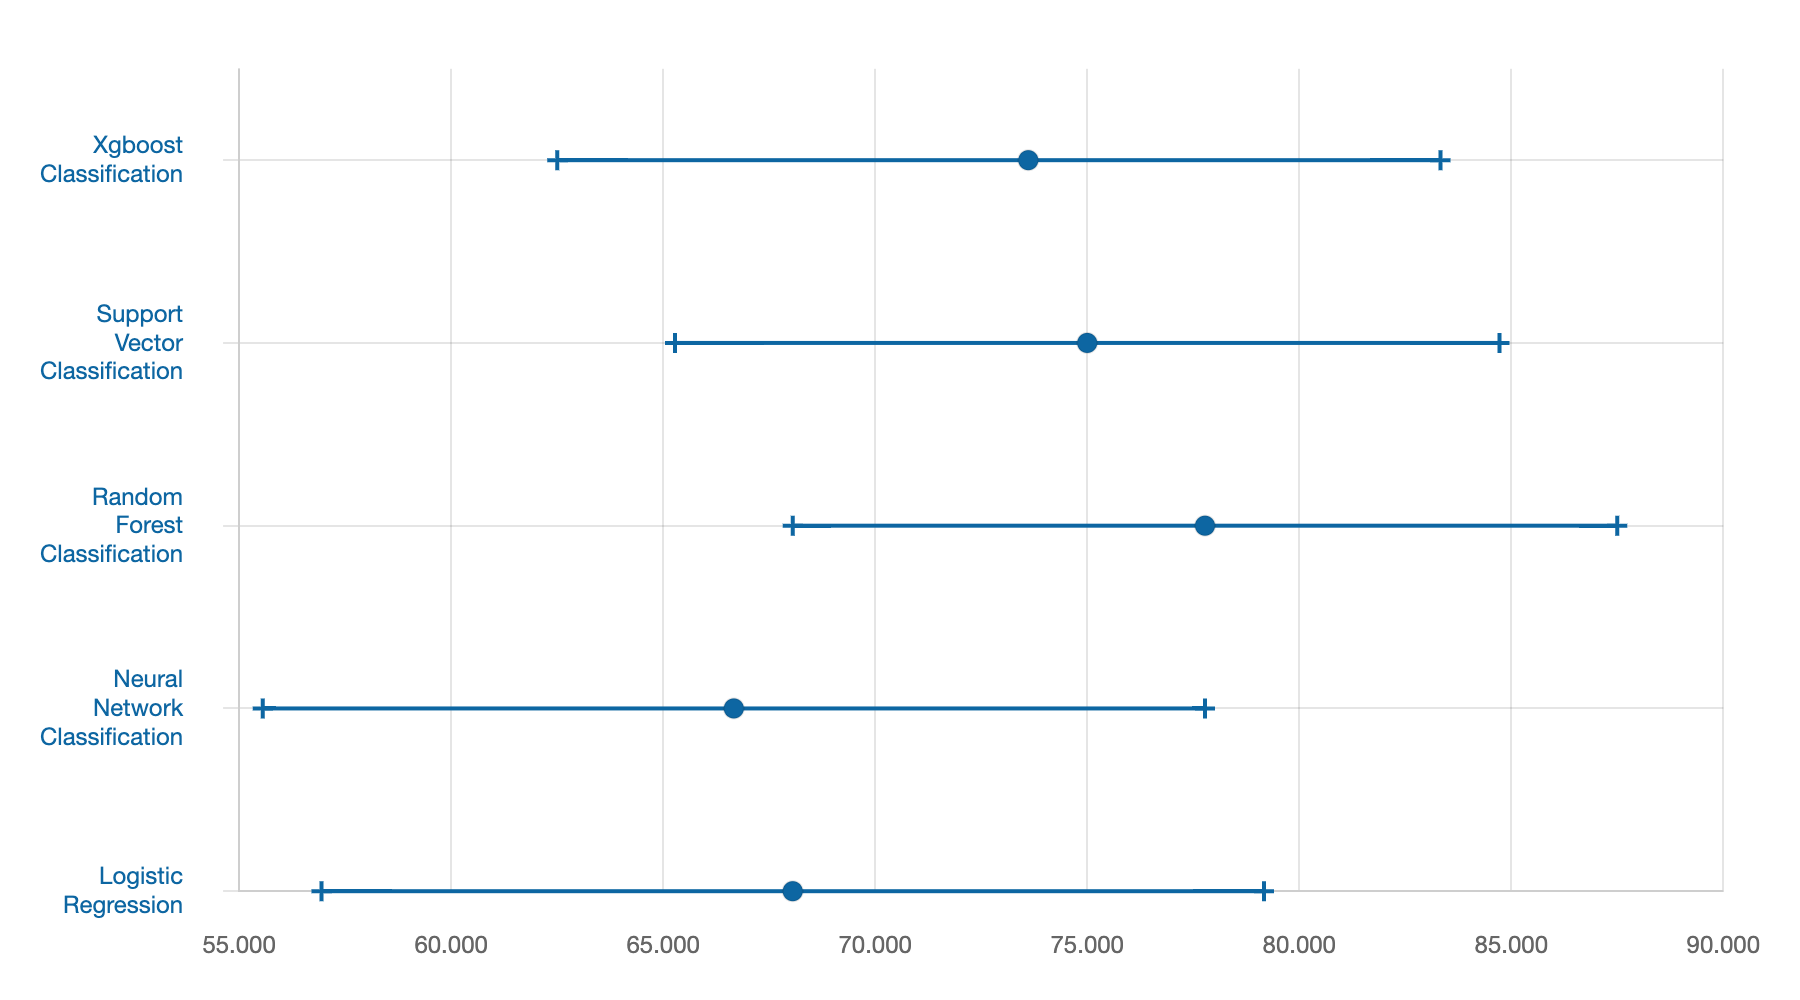